# Modul für die Auswertund der annotierten Textdaten

[Zelle # 1]

1-3: Die Variable 'tupNum', 'repert' und 'ausnahme' gelten für die Auswahl der in dem Forschungsdatenrepositorium angelegte Texte mit dem gesuchten Typ und dem Herkunftsrepertoire. Sowohl die Variable 'typNum' als auch 'repert' kann mit mit mehrere Werten -verknupft mit der Konjuktion 'or' - oder mit leeren Anführungszeichen dargestellt werden, für die Variable 'ausnahme' ist entweder ein unwahrscheinlicher Wert (z.B. 'xxyyzz') oder der Wert womit man eine bestimmte Gruppe von Daten aus der Wahl ausschließen kann eine Pflicht.

4-8: Jedes Mal bei der Aggregation des Korpus von Forschungsdaten wird der gleichnamige alte Korpus gelöscht.

9-61: Die im Ordner „Forschungsdaten“ angelegte TXT Dateien werden in der CSV Datei aggregiert und in das root Repositorium verlegt. 

62-79: 'episode_temp_auswerter.csv' laden, von den überflüssigen Zeichen bereinigen und in die Datei 'episode_string_auswerter.csv' umwandeln.

80: Unnotige Aggregation wird gelöscht.

81-85: Häufigkeitsindex der im aggregierten Forschungsdatenkorpus vorhandenen Markupelemente

In [457]:
typNum='707'
repert=''
ausnahme='zzxxyy'
def entfernen(var):
    import os
    if os.path.exists(var):
        os.remove(var)
entfernen('episode_string_auswerter.csv')
import glob
def word_to_lex(word):
    ret=(word) 
    return ret
def write_back(words):
    with open('episode_temp_auswerter.csv',"a", encoding='utf-8', errors='ignore') as output:
        for word in words:
            as_lex = word_to_lex(word[0])
            full_word = '"' + as_lex + '"'
            for sub_word in word[1:]:
                full_word += " , "  '"' + sub_word + '"'
            full_word +="\n"
            output.write(full_word)
def clean(line):
    line = line.replace("\n"," ").strip()
    line = line.replace("ä","ae").replace("ü","ue").replace("ö","oe")
    line = line.replace("ß","ss").replace(",","").replace("«","")
    line = line.replace("»","").replace(".","").replace(":","")
    line = line.replace(";","").replace('"',"")
    line = line.replace("?","").replace("!","").replace("á","a")
    line = line.replace(",","").replace("\t"," ").replace("'","")
    line = line.replace("‹","").replace("›","").replace("-"," ")
    line = line.replace("'('","").replace("')'","").replace('>','')
    line = line.replace("    "," ").replace("   "," ").replace("  "," ")
    line = line.replace('–','').replace('—','').replace('<','')
    line = line.replace("Â", "A").replace("ø", "oe").replace('“','')
    line = line.replace('„','').replace('(','').replace(')','')
    line = line.replace("‚", "").replace(']','').replace('[','')
    if line == "": 
        return
    line=line.split("|")
    line[0]=line[0].split("|")[0]
    for i, _ in enumerate(line):
        if (i !=0) and (i!=2):
            line[i]=line[i].lower()
    flex=[]
    try:
        flex=line[1].split("")
    except:
        pass
    value=str(line)
    line=str(line)   
    flex.append(line)
    ret=[]
    for i in flex:
        ret.append((i,value[0]))
    return ret
    for i in flex:
        ret.append((i,value[0]))
    return ret
with open('episode_temp_auswerter.csv', "w", encoding='utf-8', errors='ignore') as output:
    output.write ("quelle,episode,index_string,index_binar\n")
    output.write('000_ballast,ballast,ballast,0')
    output.write('\n')
pairs = []
for file in glob.glob("Forschungsdaten/*.txt"):  
    if typNum in file and repert in file and not ausnahme in file:
        with open(file, 'r', encoding='utf-8', errors='ignore') as episode:
            for line in episode.readlines():
                clean_words = clean(line)
                pairs = pairs + clean_words
write_back(pairs)
fin = open('episode_temp_auswerter.csv','r', encoding ='utf-8')
fout = open('episode_string_auswerter.csv', "wt", encoding ='utf-8')
for kfz in fin:
    fout.write(kfz.replace(', "["',"").replace('"[', "")
               .replace(']"',"").replace("', '", "','")
               .replace(" '", "'").replace("'","")
               .replace ('"',''))
fin.close()
fout.close()
entfernen('episode_temp_auswerter.csv')
import pandas as pd
df = pd.read_csv('episode_string_auswerter.csv', encoding='utf-8')
from collections import Counter
indexliste=Counter(df.index_string)
print(indexliste, sep='\n')

Counter({'e707_g_abwesenheit_des_koenigs_bis_zur_bestrafung_der_koenigin': 14, 'e707_o_bei_der_erfuellung_der_vorletzten_herausforderung': 13, 'e707_k_setzen_der_vorletzten_herausforderung': 10, 'e707_i_getrenntes_leben_bis_zur_anregung_fuer_die_wunderbare_dinge_oder_aufklaerung': 9, 'e707_w_wiedervereinigung_der_familie_bis_zur_bestraffung_des_AN': 9, 'e707_e_anfangssituation_erstes_treffen_bis_zur_schwangerschaft': 8, 'e707_m_begegnung_mit_dem_HF': 8, 'e707_u_bei_der_erfuehlung_der_letzten_herausforderung': 7, 'e707_q_setzen_der_letzten_herausforderung': 6, 'e707_s_die_letzte_begegnung_mit_dem_HF': 6, 'e403_a_': 3, 'ballast': 1})


-------------------------------------------------------------------------------------------

[Zelle # 3] 

1-40: Das Skript sorgt dafür, dass die in den betrachteten Texten vorhandenen Annotationen in eine Kette der vorherigen, der gesuchten und der folgen-den Episoden als Gliedern der gesamten Kette umgewandelt wird.

41-50: Das Skript extrachiert die im Korpus vorhandene alle Episoden.

50-66: Die extrahierte Episoden werden an die Glieder der Episodenkette des gesuchten Typs umlegen.

In [520]:
import pandas as pd
df = pd.read_csv('episode_string_auswerter.csv', encoding='utf-8')
from collections import Counter
def ep_format(ep_full):
    return (ep_full.split('_'))[0]
def ep_name_format(ep_full):
    sublist = (ep_full.split('_'))[0:2]
    name = ""
    for strg in sublist:
        name += strg+'_'
    return name
def ep_name_vollformat(ep_full):
    sublist = (ep_full.split())
    vollname = ""
    for strg in sublist:
        vollname += strg
    return vollname
def quellenvergleich (df, i1, i2):
    return df.quelle[i1]==df.quelle[i2]
def ast(gesep, df):
    ep_tree = {}
    a_liste = []
    z_liste = []  
    df_len = len(df.index_string)
    for i, ep in enumerate(df.index_string):
        if gesep == ep:
            if (i > 0)&(quellenvergleich(df, i, i-1)):
                a = df.index_string[i-1]
            else:
                a = 'eAnfang_a_'
            if (i < df_len - 1):
                if not (quellenvergleich(df, i, i+1)):
                    z = 'eEnde_a_'
                else:        
                    z = df.index_string[i+1]
            else:
                z = 'eEnde_a_'
            a_liste.append(a)
            z_liste.append(z)
    return {gesep: [Counter(a_liste), Counter(z_liste)]}
def alle_aeste(gesep, df):
    episoden_baeume = {} 
    ep_list = []
    for ep_full in df.index_string:         
        ep = ep_format(ep_full)      
        if gesep == ep:                      
            ep_list.append(ep_full)
    for ep in set(ep_list):
        episoden_baeume.update(ast(ep,df))
    return episoden_baeume
def key_val_printer(d):
    for k, v in d.items():
        print(v, k, sep=':')
def baum_printer(baeume: dict, baum: str):
    key_val_printer (baeume[baum][0])
    print(65*'-')
    print(sum(baeume[baum][0].values()),':', baum)
    print(65*'-')
    key_val_printer(baeume[baum][1]) 
def wald_printer(wald: dict):
    for baum in sorted(wald.keys()): # for baum in (wald.keys()):
        baum_printer (wald, baum)
        print(65*'=')
def key_val_printer(d):
    for k, v in d.items():
        print(v, k, sep=':')         

[Zelle # 4] - Hier wird die gesuchte Episode allein oder mit der Episodengruppen aus dem kombinierten Typ bestimmt. Nach der Ausführung des Skripts wird die entsprechende Episodenkette ausgewertet. Die dabei erscheinende Liste besteht aus Tripletten (die durch doppelte Linien getrennte Zeilengruppen). Jedes Triplett besteht aus einer mittleren Episode (die mit einfachen Linien umgebene Zeilen) welche mit einer bzw. mehreren oberen und unteren Episoden umgeben wird. Jedes Glied aus der gesuchten Episodengruppe soll als Triplett aller diese drei Mitglieder dargestellt werden. Hat eine Episode keine Anfangs- oder Ergänzungsglied so werden an der entsprechenden Stelle der Liste jeweils eine synthetische Episode: ‘eAnfang_a_‘ oder ‘eEn-de_a_‘ generiert. Somit stellt jede Episode des gesuchten Typs eine Mittlere Episode dar und tritt in Bezug auf andere Episoden (der gleichen oder anderer Kategorien) als deren vorläufige oder/und nachfolgende Episode auf.

1: Eingabefeld für die gesuchte Episodengruppe

2: Eingabefeld für kombinierte Episodengruppen (das Eingabefeld <graph.update(alle_aeste("'", df)> kann kopiert und vervielfacht werden. 

3: Visualisierung der Episodenkette.

In [521]:
graph = alle_aeste("e707", df)
graph.update(alle_aeste("e403", df))
graph.update(alle_aeste("", df))
graph.update(alle_aeste("", df))
graph.update(alle_aeste("", df))
wald_printer(graph)

1:e707_g_abwesenheit_des_koenigs_bis_zur_bestrafung_der_koenigin
2:e403_a_
-----------------------------------------------------------------
3 : e403_a_
-----------------------------------------------------------------
2:e403_a_
1:e707_i_getrenntes_leben_bis_zur_anregung_fuer_die_wunderbare_dinge_oder_aufklaerung
8:eAnfang_a_
-----------------------------------------------------------------
8 : e707_e_anfangssituation_erstes_treffen_bis_zur_schwangerschaft
-----------------------------------------------------------------
8:e707_g_abwesenheit_des_koenigs_bis_zur_bestrafung_der_koenigin
8:e707_e_anfangssituation_erstes_treffen_bis_zur_schwangerschaft
1:eAnfang_a_
5:e707_g_abwesenheit_des_koenigs_bis_zur_bestrafung_der_koenigin
-----------------------------------------------------------------
14 : e707_g_abwesenheit_des_koenigs_bis_zur_bestrafung_der_koenigin
-----------------------------------------------------------------
1:e403_a_
8:e707_i_getrenntes_leben_bis_zur_anregung_fuer_die_wun

[Zelle # 5]

1-78 Die in obiger Liste Dargestellte Begegnungen von Typen bzw. Episoden in Graphen umwandeln.

In [522]:
import matplotlib.pyplot as plt
import networkx as nx
def cutoff_ast_data(wuerzel, graph, nachbar_liste, cutoff = 0):
    vor = graph[wuerzel][0]
    zurueck = graph[wuerzel][1]
    nachbarn = vor.copy()
    nachbarn.update(zurueck)
    for ast_name, ast_gewicht in sorted(nachbarn.items()):
        if (ast_gewicht >= cutoff):
             nachbar_liste.append([ep_name_format(wuerzel), 
                                   ep_name_format(ast_name), ast_gewicht])  
def cutoff_ast_volldata(wuerzel, graph, nachbar_liste, cutoff = 0):
    vor = graph[wuerzel][0]
    zurueck = graph[wuerzel][1]
    nachbarn = vor.copy()
    nachbarn.update(zurueck)
    for ast_name, ast_gewicht in sorted(nachbarn.items()):
        if (ast_gewicht >= cutoff):
             nachbar_liste.append([ep_name_vollformat(wuerzel), 
                                   ep_name_vollformat(ast_name), ast_gewicht])               
def cutoff_graph_data(graph, cutoff = 0):
    nachbar_liste = []
    for i, (k, v) in enumerate(sorted(graph.items())):
        cutoff_ast_data(k, graph, nachbar_liste, cutoff)
    neue_nachbar_liste = [[i, nachbar] for i, nachbar in enumerate(nachbar_liste)]
    return neue_nachbar_liste
def cutoff_graph_volldata(graph, cutoff = 0):
    nachbar_liste = []
    for i, (k, v) in enumerate(sorted(graph.items())):
        cutoff_ast_volldata(k, graph, nachbar_liste, cutoff)
    neue_nachbar_liste = [[i, nachbar] for i, nachbar in enumerate(nachbar_liste)]
    return neue_nachbar_liste
def interactive_graph_data(graph_data, loesch_index, gew_dict):
    for k, v in gew_dict.items():
        graph_data[k][1][2] = v
    neue_nachbar_liste = [[i, nachbar[1]] for i, 
                          nachbar in enumerate(graph_data) if i not in loesch_index]
    return neue_nachbar_liste
def graph_bauer(graph_data):
    G = nx.Graph()
    w_liste=[]
    for el in graph_data:
        n1 = el[1][0]
        n2 = el[1][1]
        w = el[1][2]
        w_liste.append(w)
        G.add_edge(n1, n2, weight=w)
    return G,w_liste
def show_graph(G,w):
    fh = open("edgelist.utf-8", "wb")
    nx.write_multiline_adjlist(G, fh, 
                               delimiter="\t", encoding="utf-8")
    fh = open("edgelist.utf-8", "rb")
    H = nx.read_multiline_adjlist(fh, 
                                  delimiter="\t", encoding="utf-8")
    for n in G.nodes():
        if n not in H:
            print(False)
    pos = nx.spring_layout(G)
    q = max(w)
    klein = q //3
    gross = q //2  
    wenig = [(u, v) for (u, v, d) in G.edges(data=True) 
             if d["weight"] <klein]
    mehr = [(u, v) for (u, v, d) in G.edges(data=True) 
            if klein <= d["weight"] <=gross]
    viel = [(u, v) for (u, v, d) in G.edges(data=True) 
            if d["weight"] >gross]
    nx.draw(G, pos, edgelist=wenig, font_size=8, 
            edge_color="g", width=1, with_labels=False)
    nx.draw(G, pos, edgelist=mehr, font_size=8, 
            edge_color="b", width=1, with_labels=False)
    nx.draw(G, pos, edgelist=viel, font_size=8, 
            edge_color="r", width=1, with_labels=False)
    for p in pos:  # raise text positions
        pos[p][1] +=0.04
    nx.draw_networkx_labels(G, pos,  font_size=10)
    plt.show()

[Zelle # 6] - Häufigkeitsindex anpassen (1) und die Knoten betrachten.

In [528]:
haeufigkeit=5
auto_graph=cutoff_graph_data(graph, haeufigkeit)
#auto_graph

[Zelle #7] - Visualisierung der Normalform des Typs durch die Graphen.

Die Farben der Kanten sind von folgenden Bedeutung:

•	grün = selten (<=33%)

•	blau = mittel (>33% & <50%)

•	rot = häufig (>= 50%)


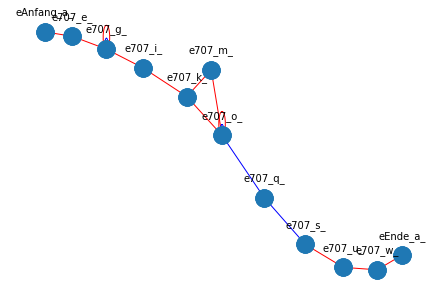

In [529]:
G,W = graph_bauer(auto_graph)
show_graph(G,W)

[Zelle # 8] - Legende (Graphen im Text).

In [447]:
liste=Counter(df.index_string)
index_liste=sorted(liste)
print(*index_liste, sep='\n')

ballast
e403_a_
e707_e_anfangssituation_erstes_treffen_bis_zur_schwangerschaft
e707_g_abwesenheit_des_koenigs_bis_zur_bestrafung_der_koenigin
e707_i_getrenntes_leben_bis_zur_anregung_fuer_die_wunderbare_dinge_oder_aufklaerung
e707_k_setzen_der_vorletzten_herausforderung
e707_m_begegnung_mit_dem_HF
e707_o_bei_der_erfuellung_der_vorletzten_herausforderung
e707_q_setzen_der_letzten_herausforderung
e707_s_die_letzte_begegnung_mit_dem_HF
e707_u_bei_der_erfuehlung_der_letzten_herausforderung
e707_w_wiedervereinigung_der_familie_bis_zur_bestraffung_des_AN


### Ende